In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [98]:
#load the data and save each item separately
data = np.load('classification.npz')
l = data.files
X_train = []
X_valid = []
y_train = []
y_valid = []
for item in l:
    #print(item)
    #print(data[item])
    if item == 'X_train':
        X_train.append(data[item])
    elif item == 'X_valid':
        X_valid.append(data[item])
    elif item == 'y_train':
        y_train.append(data[item])
    else:
        y_valid.append(data[item])

In [99]:
#reshape the data
X_train = np.matrix(np.array(X_train))
X_valid = np.matrix(np.array(X_valid))
y_train = (np.array(y_train)).reshape(-1)
y_valid = (np.array(y_valid)).reshape(-1)

In [100]:
#print the shape of all data
print("X_train:",X_train.shape)
print("X_valid:",X_valid.shape) 
print("y_train:",y_train.shape)
print("y_valid:",y_valid.shape)

X_train: (323, 800)
X_valid: (175, 800)
y_train: (323,)
y_valid: (175,)


In [34]:
#convert X_train and X_valid to dataframes for easy use
X_train = pd.DataFrame(X_train)
X_valid = pd.DataFrame(X_valid)

In [35]:
#look at contents of X_train dataframe
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-2.458746,5.518128,0.830236,1.343788,-4.601770,0.120864,-0.816803,4.720693,3.510760,7.411303,...,3.561602,-2.389009,-4.001515,1.760190,33.028689,-6.023219,-8.992061,-0.608390,5.825717,6.276930
1,-1.365936,-0.373754,1.186515,-4.325459,-3.169795,0.792745,1.837046,2.245433,-0.936190,7.198404,...,5.093922,3.491621,-0.617502,5.643555,2.607709,-4.318244,-12.193653,0.435908,2.908254,8.048277
2,-2.462232,1.892130,1.625584,-0.726393,-2.475237,0.027496,1.436646,4.734407,-0.248404,8.226472,...,0.155144,0.368741,-4.286241,4.867444,0.175239,-5.031250,-3.789902,0.341268,3.594280,5.927410
3,5.590701,-0.889517,6.618626,-0.442586,-4.084129,0.136674,2.553217,6.114984,3.190639,8.140793,...,2.506024,0.101801,-4.901393,10.349581,3.158687,-3.424169,-6.384076,-0.974716,4.795071,5.846791
4,-0.199806,0.054606,0.841362,-3.672862,-1.134632,0.235553,-1.366876,7.254239,0.734107,6.139603,...,1.422694,2.625135,-0.994015,9.157049,3.060976,-6.109376,-9.856381,-3.924461,2.049545,5.928460


In [36]:
#get a concise summary of the dataframe
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Columns: 800 entries, 0 to 799
dtypes: float64(800)
memory usage: 2.0 MB


In [37]:
#descriptive statistics
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.777804,1.664963,1.333800,-1.620022,-3.138312,0.685511,2.163719,5.428880,1.224463,7.359748,...,4.587901,0.891179,-2.247481,6.705260,5.314650,-6.301265,-7.642618,0.672437,4.933442,6.626513
std,2.358487,1.941847,1.926159,1.627134,1.895828,2.265067,1.953237,2.199869,1.661878,1.733252,...,6.240830,1.583576,2.254165,1.942107,12.058379,1.534980,2.076851,2.218215,2.099383,1.568143
min,-5.675144,-3.790636,-3.756068,-6.405578,-9.432147,0.001301,-3.611787,-0.415363,-2.991912,1.383332,...,0.085141,-3.944047,-8.657269,0.539478,0.016511,-11.203551,-14.737807,-5.423356,-1.217962,1.750934
25%,0.240983,0.340725,0.070712,-2.539704,-4.510928,0.073341,0.935843,4.014322,0.133699,6.164651,...,1.244719,-0.088078,-3.970783,5.463549,0.556016,-7.383410,-9.002650,-0.775853,3.512858,5.691267
50%,1.824741,1.624082,1.341782,-1.612470,-3.169795,0.225335,2.277448,5.452752,1.159469,7.411303,...,2.506024,0.916601,-2.300244,6.663574,1.703280,-6.197879,-7.694754,0.595337,4.979026,6.605794
75%,3.364288,2.991347,2.669130,-0.575208,-1.847056,0.520738,3.334614,6.951339,2.357794,8.564646,...,5.204570,1.931208,-0.580601,8.095936,4.956530,-5.168387,-6.199564,2.143416,6.398739,7.687760
max,8.471622,8.363948,6.789447,2.910662,3.631970,31.028703,7.403213,12.097219,7.570237,12.295230,...,60.340539,5.183685,5.025578,12.331045,123.759092,-2.063979,-2.084349,6.392716,11.230079,11.166696


In [38]:
#chekc if null values (NaN) exist in the dataset
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()

Series([], dtype: float64)

In [39]:
#correlation matrix
corr = X_train.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,1.000000,0.029897,0.094973,0.065192,-0.004577,-0.019929,-0.082714,0.122337,0.010834,-0.012766,...,-0.025122,-0.049691,-0.078772,0.084578,-0.054823,-0.076714,0.100105,0.001060,0.014135,0.061279
1,0.029897,1.000000,-0.019885,-0.014885,-0.007061,-0.025359,-0.039319,0.061187,0.027637,0.040819,...,0.034048,-0.025809,0.079797,0.092435,0.033708,-0.044300,0.009329,0.041735,-0.128982,0.085175
2,0.094973,-0.019885,1.000000,0.002760,0.070998,0.064654,0.042788,-0.008945,0.059484,-0.040092,...,0.046329,-0.019218,0.074475,-0.087072,0.058362,0.031145,-0.021932,0.086359,-0.076601,-0.062832
3,0.065192,-0.014885,0.002760,1.000000,-0.070819,0.035052,-0.020234,-0.003777,0.098380,0.027063,...,0.026787,-0.031810,-0.050724,-0.013703,-0.030259,-0.069051,-0.012464,0.021068,-0.008272,-0.031298
4,-0.004577,-0.007061,0.070998,-0.070819,1.000000,0.092535,-0.034081,-0.066564,-0.069307,0.039579,...,0.000490,0.388995,0.091243,-0.125664,-0.052793,-0.065340,-0.085132,0.050482,-0.023841,-0.088635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.076714,-0.044300,0.031145,-0.069051,-0.065340,0.053670,-0.013657,-0.110974,0.130763,0.061315,...,0.016899,-0.106638,0.088614,-0.069568,0.015088,1.000000,-0.090528,-0.049883,-0.005746,0.041783
796,0.100105,0.009329,-0.021932,-0.012464,-0.085132,-0.053643,-0.054074,0.113192,-0.048734,0.157168,...,-0.059410,-0.048046,0.002119,0.027598,-0.036903,-0.090528,1.000000,-0.075287,0.120590,-0.043536
797,0.001060,0.041735,0.086359,0.021068,0.050482,-0.070800,0.204477,0.000930,-0.034982,-0.000027,...,0.017606,0.004779,-0.014493,0.114247,0.080608,-0.049883,-0.075287,1.000000,0.000548,-0.023347
798,0.014135,-0.128982,-0.076601,-0.008272,-0.023841,0.023884,0.128278,-0.089649,-0.017092,0.461245,...,0.032264,0.041690,0.060391,-0.011906,-0.083811,-0.005746,0.120590,0.000548,1.000000,0.018933


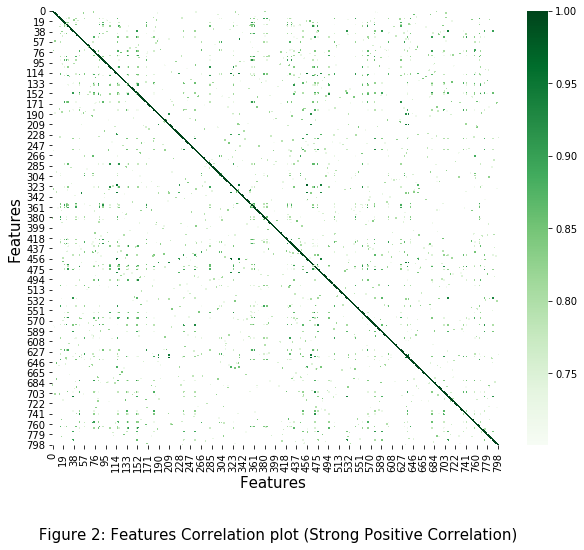

In [40]:
k = corr[corr>=0.7]
plt.figure(figsize=(10,8))
sns.heatmap(k, cmap="Greens")
plt.xlabel('Features \n\n\n Figure 2: Features Correlation plot (Strong Positive Correlation)', fontsize=15)
plt.ylabel('Features', fontsize=15);

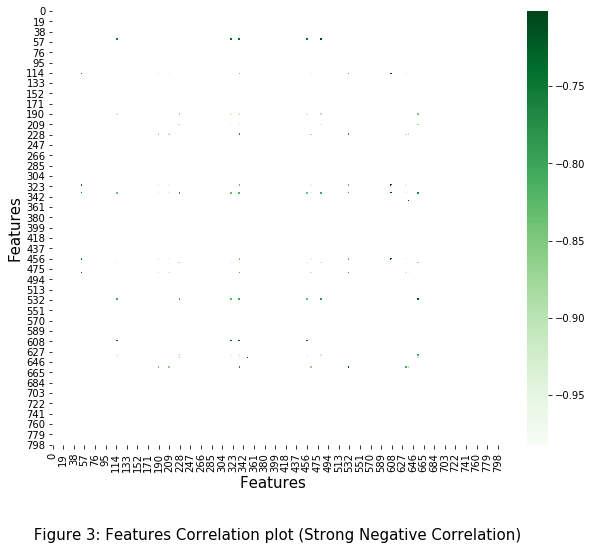

In [41]:
k = corr[corr<=-0.7]
plt.figure(figsize=(10,8))
sns.heatmap(k, cmap="Greens")
plt.xlabel('Features \n\n\n Figure 3: Features Correlation plot (Strong Negative Correlation)', fontsize=15)
plt.ylabel('Features', fontsize=15);

### Preprocessing

In [42]:
#preprocessing the data (training and valid)
#PCA's output is influenced based on the scale of the features of the data
from sklearn.preprocessing import StandardScaler

Xt_scaler = StandardScaler().fit_transform(X_train)
Xv_scaler = StandardScaler().fit_transform(X_valid)
Xt_scaler

array([[-1.79908701,  1.98735685, -0.26183963, ..., -0.57830935,
         0.42567747, -0.22327397],
       [-1.33501598, -1.05151464, -0.07658414, ..., -0.10679612,
        -0.96615551,  0.90806106],
       [-1.8005673 ,  0.11716656,  0.15171975, ..., -0.14952714,
        -0.6388734 , -0.44650748],
       ...,
       [ 0.24792804,  0.14172003, -0.8365737 , ...,  0.59465156,
         2.78229918,  2.3458422 ],
       [-0.52791476, -0.07873735,  0.89251622, ..., -0.00556944,
        -0.03598314,  0.85344481],
       [ 0.1358705 ,  1.47514086,  0.30520682, ..., -0.37209793,
         0.41196203, -0.85949993]])

In [43]:
X_train1 = X_train
X_train1['y'] = y_train

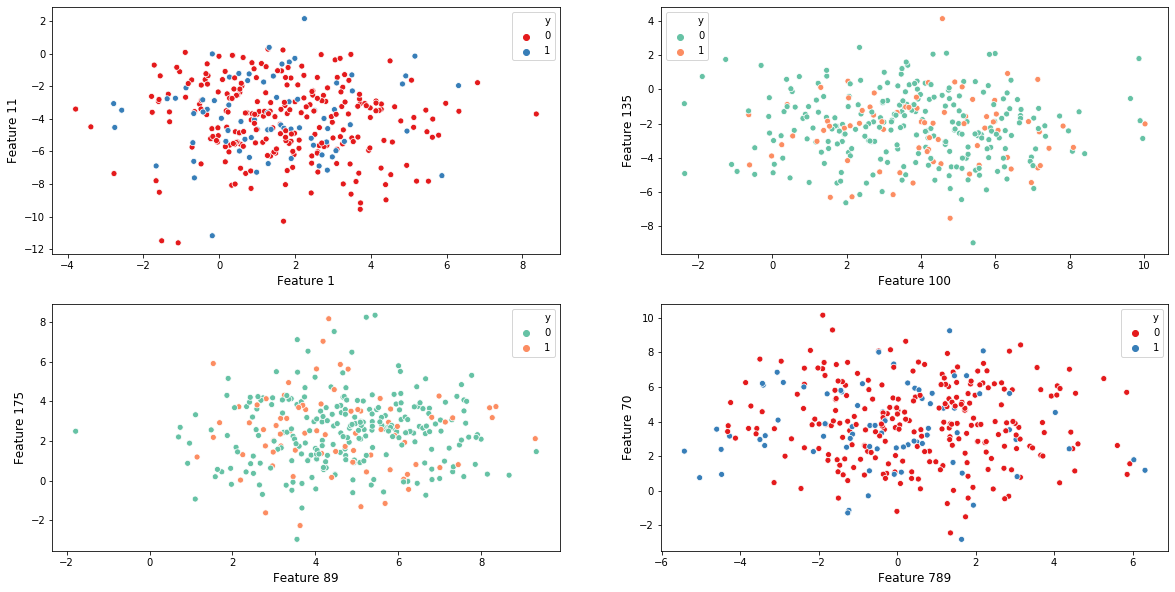

In [44]:
#visualize some features
np.random.seed(42)
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.scatterplot(X_train1[1], X_train1[11], ax=ax[0,0], hue=X_train1['y'], palette="Set1")
ax[0,0].set_xlabel('Feature 1', fontsize=12)
ax[0,0].set_ylabel('Feature 11', fontsize=12)

sns.scatterplot(X_train1[100], X_train1[135],  ax=ax[0,1], hue=X_train1['y'], palette="Set2")
ax[0,1].set_xlabel('Feature 100', fontsize=12)
ax[0,1].set_ylabel('Feature 135', fontsize=12)

sns.scatterplot(X_train1[89], X_train1[175],  ax=ax[1,0], hue=X_train1['y'], palette="Set2")
ax[1,0].set_xlabel('Feature 89', fontsize=12)
ax[1,0].set_ylabel('Feature 175', fontsize=12)

sns.scatterplot(X_train1[789], X_train1[70],  ax=ax[1,1], hue=X_train1['y'], palette="Set1")
ax[1,1].set_xlabel('Feature 789', fontsize=12)
ax[1,1].set_ylabel('Feature 70', fontsize=12);

In [45]:
#plot PCA of the dataset to observe the distribution of the data, 
#which will help in noticing linear or non linear behaviour in the dataset and decide what good methods to use for it
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X_train).transform(X_train)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.16243397 0.11119017]


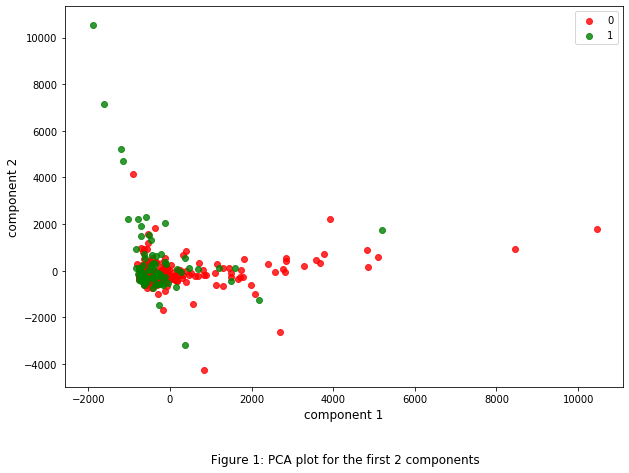

In [46]:
#plot pca
plt.figure(figsize=(10,7))
colors = ['red', 'green']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.8, label=i)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('component 1\n\n\n Figure 1: PCA plot for the first 2 components', fontsize=12)
plt.ylabel('component 2', fontsize=12)
plt.legend();

In [47]:
rndperm = np.random.permutation(X_train1.shape[0])
pca1 = PCA(n_components=3)
pca1_result = pca1.fit_transform(X_train1.values)
X_train1['pca-one'] = pca1_result[:,0]
X_train1['pca-two'] = pca1_result[:,1] 
X_train1['pca-three'] = pca1_result[:,2]
print('Explained variation per principal component: {}'.format(pca1.explained_variance_ratio_))

Explained variation per principal component: [0.16243397 0.11119017 0.10364673]


### Training a baseline classifier

In [49]:
# Creating a baseline using the most common result
#stratified folds. The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold #StratifiedKFold(n_splits=10)
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

# and see how it performs over the dataset using cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xt_scaler, y_train, cv = 10).mean()

0.7647727272727273

**Trying out some different classifiers**

In [50]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf_gini = DecisionTreeClassifier()

CV_result = cross_val_score(decision_tree_clf_gini, Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("CV results:", CV_result)
print("CV mean:", CV_result.mean())

CV results: [0.72727273 0.6969697  0.75757576 0.8125     0.59375    0.8125
 0.71875    0.6875     0.6875     0.78125   ]
CV mean: 0.7275568181818182


In [51]:
decision_tree_clf_entr = DecisionTreeClassifier(criterion="entropy")

CV_result_entr = cross_val_score(decision_tree_clf_entr, Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("CV result_entr:", CV_result_entr)
print("CV mean_entr:", CV_result_entr.mean())

CV result_entr: [0.63636364 0.60606061 0.75757576 0.71875    0.71875    0.71875
 0.65625    0.59375    0.65625    0.78125   ]
CV mean_entr: 0.684375


In [52]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_clf = RandomForestClassifier()
RF_result = cross_val_score(Random_Forest_clf, Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("RF results:", RF_result)
print("RF mean result:", RF_result.mean())

RF results: [0.75757576 0.75757576 0.75757576 0.8125     0.78125    0.78125
 0.78125    0.71875    0.78125    0.75      ]
RF mean result: 0.7678977272727272


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lr_result = cross_val_score(LogisticRegression(max_iter=100000), Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("LR results:", lr_result)
print("LR mean result:",lr_result.mean())

LR results: [0.81818182 0.87878788 0.81818182 0.875      0.71875    0.78125
 0.78125    0.84375    0.75       0.875     ]
LR mean result: 0.8140151515151516


In [54]:
from sklearn.neighbors import KNeighborsClassifier

KNN_result = cross_val_score(KNeighborsClassifier(), Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("KNN results:", KNN_result)
print("KNN mean result:", KNN_result.mean())

KNN results: [0.66666667 0.75757576 0.72727273 0.75       0.75       0.8125
 0.75       0.71875    0.71875    0.6875    ]
KNN mean result: 0.7339015151515151


In [55]:
from sklearn.naive_bayes import GaussianNB

NB_result = cross_val_score(GaussianNB(), Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("NB results:", NB_result)
print("NB mean result:", NB_result.mean())

NB results: [0.75757576 0.72727273 0.72727273 0.71875    0.75       0.6875
 0.65625    0.6875     0.75       0.75      ]
NB mean result: 0.7212121212121212


In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_result = cross_val_score(LinearDiscriminantAnalysis(), Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("LDA results:", LDA_result)
print("LDA mean result:", LDA_result.mean())

LDA results: [0.72727273 0.72727273 0.78787879 0.875      0.78125    0.75
 0.71875    0.78125    0.6875     0.8125    ]
LDA mean result: 0.7648674242424243


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA_result = cross_val_score(QuadraticDiscriminantAnalysis(), Xt_scaler, y_train, cv=StratifiedKFold(n_splits=10))
print("QDA results:", QDA_result)
print("QDA mean result:", QDA_result.mean())

QDA results: [0.36363636 0.36363636 0.27272727 0.375      0.46875    0.3125
 0.34375    0.34375    0.3125     0.5       ]
QDA mean result: 0.365625


/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/sarahalkhateeb/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analy

**We can see that:**
- there is high correlation between predictors, 
- 𝑝 > 𝑛 
- So Regularisation or feature selection must be applied

### Feature selection

**Logistic Regression With A L1 Penalty With Various Regularization Strengths**

In [58]:
#choosing best regularization strength
from sklearn.feature_selection import SelectFromModel #selecting features based on importance weights.

rs = [100, 10, 5, 1, .1, .05, 0.06]
for r in rs:
    #C:Inverse of regularization strength
    #C:smaller values specify stronger regularization ; C=1/λ
    clf = LogisticRegression(penalty='l1', C=r, solver='liblinear').fit(Xt_scaler, y_train) 
    model = SelectFromModel(clf, prefit=True)
    Xt_new = model.transform(Xt_scaler)
    print('Regularization Strength:', r)
    print("Training Data shape:", Xt_new.shape)
    print('Coefficient of each feature:\n', clf.coef_[:,1:20])
    print('Training accuracy:', clf.score(Xt_scaler, y_train))
    print('Test accuracy:', clf.score(Xv_scaler, y_valid))
    print('')

Regularization Strength: 100
Training Data shape: (323, 179)
Coefficient of each feature:
 [[ 0.          0.          0.          0.          0.20103915 -0.28162699
   0.          0.          0.          0.          0.          0.
   0.          0.          0.16828207  0.          0.          0.
   0.        ]]
Training accuracy: 1.0
Test accuracy: 0.84

Regularization Strength: 10
Training Data shape: (323, 150)
Coefficient of each feature:
 [[ 0.          0.          0.          0.          0.22556611 -0.10274129
   0.          0.          0.          0.          0.          0.
   0.          0.          0.00892994  0.          0.          0.
   0.        ]]
Training accuracy: 1.0
Test accuracy: 0.8514285714285714

Regularization Strength: 5
Training Data shape: (323, 142)
Coefficient of each feature:
 [[ 0.          0.          0.          0.          0.17403878 -0.06048728
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.   

Training accuracy: 0.9040247678018576
Test accuracy: 0.8285714285714286


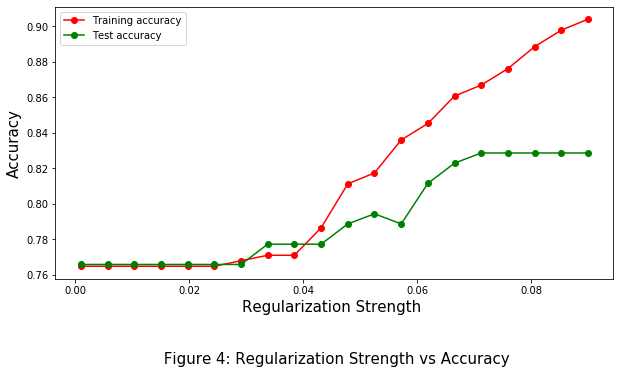

In [59]:
#choosing best regularization strength
from sklearn.feature_selection import SelectFromModel #selecting features based on importance weights.


plt.figure(figsize=(10,5))
num = [i for i in np.linspace(.001, 0.09, num=20)]
# 
acc = []
acc1 = []
for t in num:
    clf = LogisticRegression(penalty='l1', C=t, solver='liblinear').fit(Xt_scaler, y_train) 
    acc.append(clf.score(Xt_scaler, y_train))
    acc1.append(clf.score(Xv_scaler, y_valid))

print("Training accuracy:", max(acc))
print("Test accuracy:", max(acc1))
plt.plot(num, acc, 'ro-', label = 'Training accuracy')
plt.plot(num, acc1, 'go-', label = 'Test accuracy')
plt.xlabel('Regularization Strength \n\n\n Figure 4: Regularization Strength vs Accuracy', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()
plt.show();

In [60]:
# apply lasso logistic regression whith the chosen regularization strength

clf_lr = LogisticRegression(penalty='l1', C=0.057, solver='liblinear').fit(Xt_scaler, y_train) 
model = SelectFromModel(clf_lr, prefit=True)
m = model.get_support()

In [61]:
lr2 = m.tolist()

def getIndexPositions(Elements, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    indexList = []
    indexP = 0
    while True:
        try:
            # Search for item in list from indexP to the end of list
            indexP = Elements.index(element, indexP)
            # Add the index position in list
            indexList.append(indexP)
            indexP += 1
        except ValueError as e:
            break
 
    return indexList

print("LR with Lassso Number of features:", len(getIndexPositions(lr2, True)))
print(getIndexPositions(lr2, True))

LR with Lassso Number of features: 16
[33, 151, 207, 232, 288, 296, 323, 346, 396, 533, 583, 587, 594, 619, 666, 739]


In [1139]:
#Feature selection using RFE
# To use Stratified K-Folds cross-validator
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
from sklearn.model_selection import StratifiedKFold

# To use recursive feature eliminatin with cross-validation (RFECV)
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
from sklearn.feature_selection import RFECV

# Use the best model from 10-fold cross validation experiment
# Copy from the result above
model = LogisticRegression()

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_lr = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
rfecv_lr.fit(Xt_scaler, y_train)

print("Optimal number of features : %d" % rfecv_lr.n_features_)

Optimal number of features : 17


Max score: 0.9007575757575758
Optimal number of features : 17


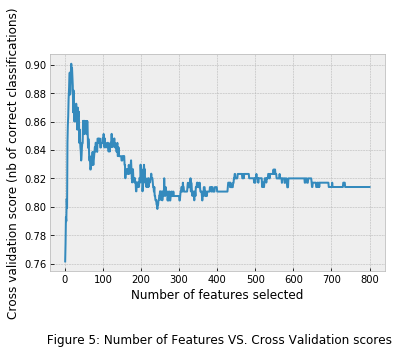

In [1309]:
# Plot number of features VS. cross-validation scores
plt.figure()
print("Max score:", max(rfecv_lr.grid_scores_))
print("Optimal number of features : %d" % rfecv_lr.n_features_)
plt.xlabel("Number of features selected\n\n\n Figure 5: Number of Features VS. Cross Validation scores")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_lr.grid_scores_) + 1), rfecv_lr.grid_scores_)
plt.show()

In [1339]:
lrl = rfecv_lr.support_.tolist()

def getIndexPositions(Elements, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    indexList = []
    indexP = 0
    while True:
        try:
            # Search for item in list from indexP to the end of list
            indexP = Elements.index(element, indexP)
            # Add the index position in list
            indexList.append(indexP)
            indexP += 1
        except ValueError as e:
            break
 
    return indexList

print("LR with RFE Number of features:", len(getIndexPositions(lrl, True)))
print(getIndexPositions(lrl, True))

LR with RFE Number of features: 17
[33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]


### Random Forest

In [62]:
#choosing number of folds
k = 3
Random_Forest_clf = RandomForestClassifier()
RF_result = cross_val_score(Random_Forest_clf, Xt_scaler, y_train, cv = 3)
print("K-folds:", k)
print("RF results:", RF_result)
print("RF mean result:", RF_result.mean())
print()
k = 5
Random_Forest_clf = RandomForestClassifier()
RF_result = cross_val_score(Random_Forest_clf, Xt_scaler, y_train, cv = 5)
print("K-folds:", k)
print("RF results:", RF_result)
print("RF mean result:", RF_result.mean())
print()
k = 10
Random_Forest_clf = RandomForestClassifier()
RF_result = cross_val_score(Random_Forest_clf, Xt_scaler, y_train, cv = 10)
print("K-folds:", k)
print("RF results:", RF_result)
print("RF mean result:", RF_result.mean())

K-folds: 3
RF results: [0.76851852 0.75925926 0.75700935]
RF mean result: 0.76159570785739

K-folds: 5
RF results: [0.76923077 0.78461538 0.75384615 0.75       0.765625  ]
RF mean result: 0.7646634615384615

K-folds: 10
RF results: [0.75757576 0.75757576 0.75757576 0.8125     0.78125    0.78125
 0.78125    0.71875    0.75       0.75      ]
RF mean result: 0.7647727272727273


- we can notice that for cv=10 the accuracy is the highest

Training accuracy: 0.7678977272727272
Test accuracy: 0.7885714285714286


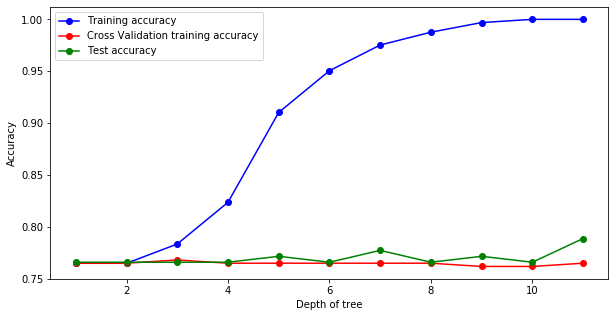

In [63]:
#sets the maximum depth for tree classifier (Random Forest Classifier)
from sklearn.metrics import accuracy_score
plt.figure(figsize=(10,5))
# List of values to try for max_depth:
max_depth = [i for i in range(1, 12)]
# 
acc = []
accuracy2 = []
accuracy3 = []
for d in max_depth:
    cls = RandomForestClassifier(max_depth = d, n_estimators = 100, n_jobs=-1) #n_job = -1 all CPU corecores will be used
    cls.fit(Xt_scaler, y_train)
    score = cls.score(Xt_scaler, y_train)
    acc.append(score)
    score2 = cross_val_score(cls, Xt_scaler, y_train, cv=10).mean()
    accuracy2.append(score2)
    pred = cls.predict(Xv_scaler)
    score3 = accuracy_score(y_valid, pred)
    accuracy3.append(score3)

print("Training accuracy:", max(accuracy2))
print("Test accuracy:", max(accuracy3))
plt.plot(max_depth, acc,'bo-', label = 'Training accuracy')
plt.plot(max_depth, accuracy2, 'ro-', label = 'Cross Validation training accuracy')
plt.plot(max_depth, accuracy3, 'go-', label = 'Test accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

Training accuracy: 0.7770833333333333
Test accuracy: 0.7657142857142857


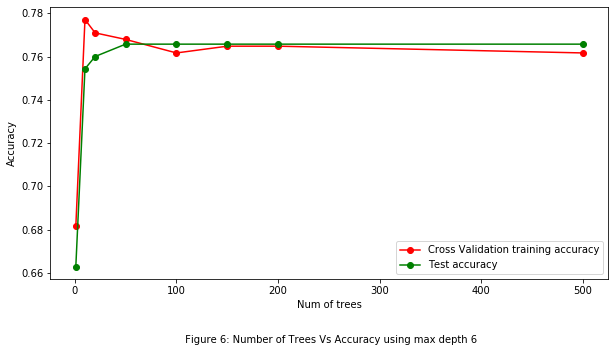

In [64]:
plt.figure(figsize=(10,5))
num_tree = [1, 10, 20, 50, 100, 150, 200, 500]
# 
acc2 = []
acc3 = []
acc4 = []
for tr in num_tree:
    cls = RandomForestClassifier(max_depth = 6, n_estimators = tr, n_jobs=-1) #n_job = -1 all CPU corecores will be used
    cls.fit(Xt_scaler, y_train)
    score = cls.score(Xt_scaler, y_train)
    acc2.append(score)
    score2 = cross_val_score(cls, Xt_scaler, y_train, cv=10).mean()
    acc3.append(score2)
    pred = cls.predict(Xv_scaler)
    score3 = accuracy_score(pred, y_valid)
    acc4.append(score3)

print("Training accuracy:", max(acc3))
print("Test accuracy:", max(acc4))
#plt.plot(num_tree, acc2,'bo-', label = 'Training accuracy')
plt.plot(num_tree, acc3, 'ro-', label = 'Cross Validation training accuracy')
plt.plot(num_tree, acc4, 'go-', label = 'Test accuracy')
plt.xlabel('Num of trees\n\n\n Figure 6: Number of Trees Vs Accuracy using max depth 6')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [65]:
#try different values for n_estimator (number of trees)

num_to_test = {'n_estimators': [1, 50, 100, 200]}
# Use out-of-bag samples to estimate the generalization accuracy
rf = RandomForestClassifier(oob_score=True, random_state=0)

In [66]:
# n-fold cross validation
from sklearn.model_selection import GridSearchCV

# 10-fold cross validation, return training score
grid10 = GridSearchCV(rf, param_grid = num_to_test, cv = 10, scoring ='accuracy', n_jobs=2, return_train_score = True)

# Do the training
grid10.fit(Xt_scaler,y_train)
grid10.cv_results_

{'mean_fit_time': array([0.01306953, 0.21663108, 0.42735305, 0.83913531]),
 'std_fit_time': array([0.00499994, 0.00525116, 0.00698938, 0.01096436]),
 'mean_score_time': array([0.00097201, 0.00400827, 0.00730197, 0.0134804 ]),
 'std_score_time': array([4.29657606e-04, 1.95489204e-04, 8.98809616e-05, 1.63025054e-04]),
 'param_n_estimators': masked_array(data=[1, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.57575758, 0.78787879, 0.78787879, 0.75757576]),
 'split1_test_score': array([0.60606061, 0.72727273, 0.75757576, 0.75757576]),
 'split2_test_score': array([0.75757576, 0.75757576, 0.75757576, 0.75757576]),
 'split3_test_score': array([0.71875, 0.8125 , 0.8125 , 0.8125 ]),
 'split4_test_score': array([0.5625 , 0.78125, 0.78125, 0.78125]),
 'split5_test_score': array([0.71875, 0.78

In [67]:
# Find the best model and the score from the cross validation experiment

print('The best model:', grid10.best_estimator_)
print('The best score: ', grid10.best_score_)

The best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)
The best score:  0.7678030303030303


### Feature importances in random forest classifiers

Feature ranking:
1. feature 33 (0.016957)
2. feature 288 (0.013610)
3. feature 533 (0.008567)
4. feature 323 (0.007863)
5. feature 587 (0.007682)
6. feature 240 (0.007592)
7. feature 144 (0.007510)
8. feature 232 (0.006240)
9. feature 666 (0.006190)
10. feature 471 (0.005894)
11. feature 755 (0.005447)
12. feature 235 (0.005417)
13. feature 784 (0.004794)
14. feature 449 (0.004732)
15. feature 789 (0.004491)
16. feature 665 (0.004420)
17. feature 251 (0.004392)
18. feature 409 (0.004343)
19. feature 496 (0.004273)
20. feature 763 (0.004170)
21. feature 58 (0.004104)
22. feature 774 (0.004099)
23. feature 528 (0.004031)
24. feature 189 (0.003927)
25. feature 29 (0.003891)
26. feature 619 (0.003884)
27. feature 37 (0.003822)
28. feature 476 (0.003667)
29. feature 709 (0.003637)
30. feature 381 (0.003507)
31. feature 738 (0.003505)
32. feature 222 (0.003503)
33. feature 180 (0.003475)
34. feature 491 (0.003446)
35. feature 299 (0.003426)
36. feature 600 (0.003425)
37. feature 53 (0.003418

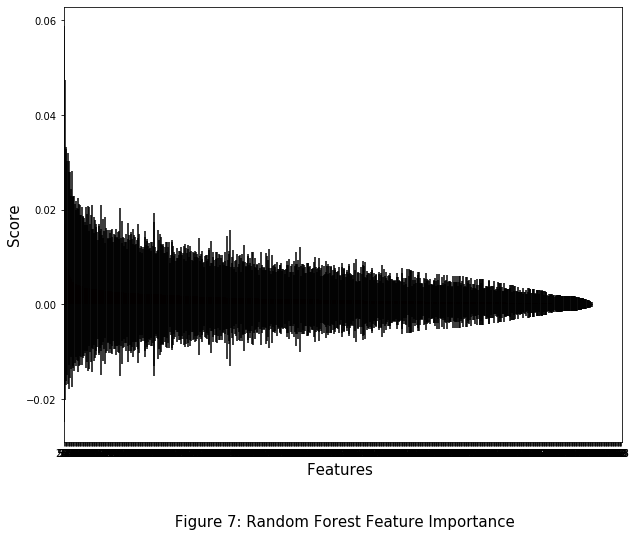

In [68]:
#feature importance: refers to techniques that assign a score to input features based 
#on how useful they are at predicting a target variable.
#Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node.

Random_Forest_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

Random_Forest_clf.fit(Xt_scaler,y_train)
importances = Random_Forest_clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in Random_Forest_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xt_scaler.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
#plt.title("Feature importances")
plt.bar(range(Xt_scaler.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xt_scaler.shape[1]), indices)
plt.xlim([-1, Xt_scaler.shape[1]])
plt.xlabel('Features \n\n\n Figure 7: Random Forest Feature Importance', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

In [462]:
# To use Stratified K-Folds cross-validator
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
from sklearn.model_selection import StratifiedKFold

# To use recursive feature eliminatin with cross-validation (RCECV)
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
from sklearn.feature_selection import RFECV

# Use the best model from 10-fold cross validation experiment
# Copy from the result above
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

# Create the RFE object and compute a cross-validated score.

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_5 = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
rfecv_5.fit(Xt_scaler, y_train)

print("Optimal number of features : %d" % rfecv_5.n_features_)

Optimal number of features : 17


Max score: 0.8049519230769231
Optimal number of features : 17


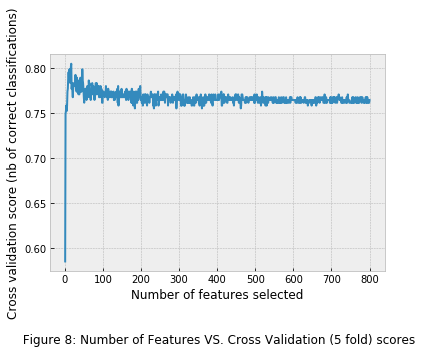

In [1336]:
# Plot number of features VS. cross-validation scores
plt.figure()
print("Max score:", max(rfecv_5.grid_scores_))
print("Optimal number of features : %d" % rfecv_5.n_features_)
plt.xlabel("Number of features selected\n\n\n Figure 8: Number of Features VS. Cross Validation (5 fold) scores")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_5.grid_scores_) + 1), rfecv_5.grid_scores_)
plt.show()

In [1341]:
l = rfecv_5.support_.tolist()

#for (i, item) in enumerate(l, start=0):
   # print(i, item)

In [1342]:
def getIndexPositions(Elements, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    indexList = []
    indexP = 0
    while True:
        try:
            # Search for item in list from indexP to the end of list
            indexP = Elements.index(element, indexP)
            # Add the index position in list
            indexList.append(indexP)
            indexP += 1
        except ValueError as e:
            break
 
    return indexList

print("RF with RFE (5 fold) Number of features:", len(getIndexPositions(l, True)))
print(getIndexPositions(l, True))

RF with RFE (5 fold) Number of features: 17
[33, 144, 189, 232, 235, 240, 288, 323, 436, 496, 533, 587, 619, 666, 682, 709, 739]


In [363]:
# To use Stratified K-Folds cross-validator
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html 
from sklearn.model_selection import StratifiedKFold

# To use recursive feature eliminatin with cross-validation (RCECV)
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
from sklearn.feature_selection import RFECV

# Use the best model from 10-fold cross validation experiment
# Copy from the result above
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

# Create the RFE object and compute a cross-validated score.

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=10), scoring='accuracy')
rfecv.fit(Xt_scaler, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 35


In [1353]:
p = rfecv.predict(Xv_scaler)
p1 = rfecv_5.predict(Xv_scaler)

In [1355]:
ac = accuracy_score(p, y_valid)
ac1 = accuracy_score(p1, y_valid)
print(ac, ac1)

0.76 0.7771428571428571


Max score: 0.8112689393939394
Optimal number of features : 35


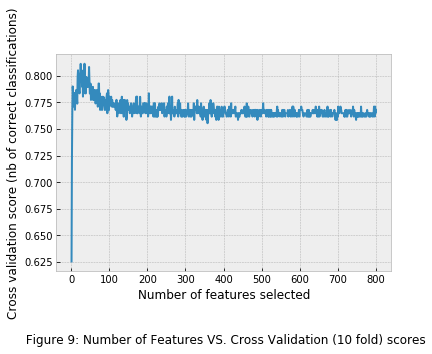

In [1337]:
# Plot number of features VS. cross-validation scores
print("Max score:", max(rfecv.grid_scores_))
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected\n\n\n Figure 9: Number of Features VS. Cross Validation (10 fold) scores")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [1343]:
l1 = rfecv.support_.tolist()

#for (i, item) in enumerate(l1, start=0):
 #   print(i, item)

In [1344]:
def getIndexPositions(Elements, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    indexList = []
    indexP = 0
    while True:
        try:
            # Search for item in list from indexP to the end of list
            indexP = Elements.index(element, indexP)
            # Add the index position in list
            indexList.append(indexP)
            indexP += 1
        except ValueError as e:
            break
 
    return indexList

print("RF with RFE (10 fold) Number of features:", len(getIndexPositions(l1, True)))
print(getIndexPositions(l1, True))

RF with RFE (10 fold) Number of features: 35
[6, 13, 33, 72, 144, 151, 189, 191, 232, 235, 240, 251, 270, 288, 323, 346, 391, 396, 400, 436, 449, 451, 471, 491, 496, 511, 533, 587, 619, 666, 682, 709, 739, 755, 794]


### Two methods comparison

In [69]:
#implement logistic regression with features selected by random forest
#rfe_rf_cv5: [33, 144, 189, 232, 235, 240, 288, 323, 436, 496, 533, 587, 619, 666, 682, 709, 739]
#lasso:[33, 151, 207, 232, 288, 296, 323, 346, 396, 471, 533, 582, 583, 587, 594, 619, 642, 666, 739]
#rfe_rf_cv10: [6, 13, 33, 72, 144, 151, 189, 191, 232, 235, 240, 251, 270, 288, 323, 346, 391, 396, 400, 436, 
#        449, 451, 471, 491, 496, 511, 533, 587, 619, 666, 682, 709, 739, 755, 794]
#rfe_lr: [33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]


datat1 = X_train[[33, 144, 189, 232, 235, 240, 288, 323, 436, 496, 533, 587, 619, 666, 682, 709, 739]]#from rfe_rf_5
datat1 = StandardScaler().fit_transform(datat1)
#datat2 = X_train[[33, 151, 207, 232, 288, 296, 323, 346, 396, 471, 533, 582, 583, 587, 594, 619, 642, 666, 739]]#lasso
datat2 = X_train[[33, 151, 207, 232, 288, 296, 323, 346, 396, 533, 583, 587, 594, 619, 666, 739]]
datat2 = StandardScaler().fit_transform(datat2)
datat3 = X_train[[6, 13, 33, 72, 144, 151, 189, 191, 232, 235, 240, 251, 270, 288, 323, 346, 391, 396, 400, 436, 449, 
                 451, 471, 491, 496, 511, 533, 587, 619, 666, 682, 709, 739, 755, 794]]#rfe_rf_10
datat3 = StandardScaler().fit_transform(datat3)
datat4 = X_train[[33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]]#from rfe_lr
datat4 = StandardScaler().fit_transform(datat4)

datav1 = X_valid[[33, 144, 189, 232, 235, 240, 288, 323, 436, 496, 533, 587, 619, 666, 682, 709, 739]]#from rfe_rf_5
datav1 = StandardScaler().fit_transform(datav1)
#datav2 = X_valid[[33, 151, 207, 232, 288, 296, 323, 346, 396, 471, 533, 582, 583, 587, 594, 619, 642, 666, 739]]#lasso
datav2 = X_valid[[33, 151, 207, 232, 288, 296, 323, 346, 396, 533, 583, 587, 594, 619, 666, 739]]
datav2 = StandardScaler().fit_transform(datav2)
datav3 = X_valid[[6, 13, 33, 72, 144, 151, 189, 191, 232, 235, 240, 251, 270, 288, 323, 346, 391, 396, 400, 436, 449, 
                 451, 471, 491, 496, 511, 533, 587, 619, 666, 682, 709, 739, 755, 794]]#rfe_rf_10
datav3 = StandardScaler().fit_transform(datav3)
datav4 = X_valid[[33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]]#from rfe_lr
datav4 = StandardScaler().fit_transform(datav4)

In [70]:
#correlation matrix
datat5 = pd.DataFrame(datat4)#tried datat2 and datat3
corr1 = datat5.corr()
corr1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000000,-0.055697,-0.002019,0.025460,0.779386,-0.014172,0.052506,-0.030071,-0.100065,-0.003709,0.033904,-0.027282,-0.000597,0.020582,0.016944,-0.050786,0.056344
1,-0.055697,1.000000,-0.006780,-0.064819,-0.051719,-0.034958,0.056182,0.004473,-0.038820,-0.044477,-0.023742,-0.038863,0.674851,0.128582,-0.055117,0.113382,-0.036422
2,-0.002019,-0.006780,1.000000,0.031342,0.105063,-0.055359,0.046698,-0.006729,0.004964,0.029080,0.011114,0.019283,0.010865,0.030862,-0.085349,0.141050,0.038710
3,0.025460,-0.064819,0.031342,1.000000,0.010149,0.122340,0.030059,-0.027904,-0.088967,-0.026347,-0.048691,0.061422,-0.105975,-0.034780,0.308610,0.009136,-0.034174
4,0.779386,-0.051719,0.105063,0.010149,1.000000,-0.000529,-0.002650,-0.007952,-0.082992,0.068520,0.068421,-0.026307,-0.008415,0.000684,-0.028601,-0.023927,0.036196
5,-0.014172,-0.034958,-0.055359,0.122340,-0.000529,1.000000,0.085433,-0.053516,0.007725,-0.046146,0.040631,0.051680,-0.065182,-0.047471,0.274841,-0.026996,-0.079164
6,0.052506,0.056182,0.046698,0.030059,-0.002650,0.085433,1.000000,-0.035182,-0.030679,0.086046,0.113156,0.048433,0.040433,0.043889,0.060003,0.152963,0.067606
7,-0.030071,0.004473,-0.006729,-0.027904,-0.007952,-0.053516,-0.035182,1.000000,0.020326,-0.018578,0.050412,-0.018680,-0.057193,0.082659,0.049736,0.025897,-0.045881
8,-0.100065,-0.038820,0.004964,-0.088967,-0.082992,0.007725,-0.030679,0.020326,1.000000,0.036619,0.012361,0.084060,-0.022775,-0.028713,0.022208,-0.095830,0.058478
9,-0.003709,-0.044477,0.029080,-0.026347,0.068520,-0.046146,0.086046,-0.018578,0.036619,1.000000,0.023317,0.038030,-0.064138,-0.015318,0.006416,-0.105920,0.058861


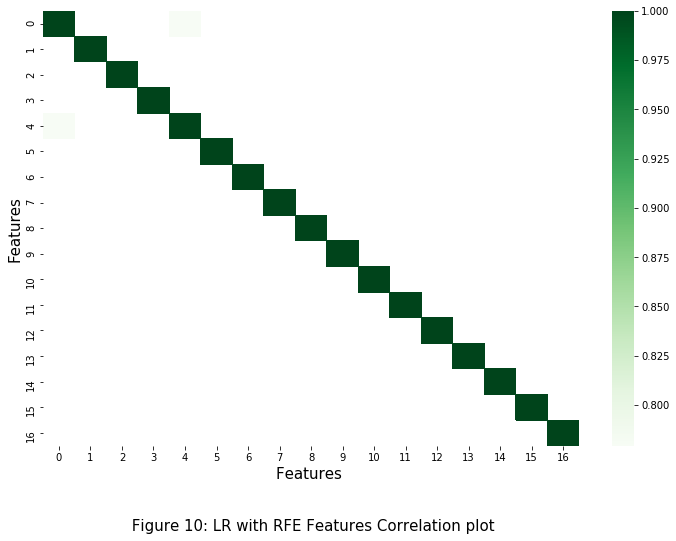

In [71]:
k1 = corr1[corr1>=0.7]
plt.figure(figsize=(12,8))
sns.heatmap(k1, cmap="Greens")
plt.xlabel('Features \n\n\n Figure 10: LR with RFE Features Correlation plot', fontsize=15)
plt.ylabel('Features', fontsize=15);

In [73]:
#plot PCA of the dataset to observe the distribution of the data, 
#which will help in noticing linear or non linear behaviour in the dataset and decide what good methods to use for it
data5 =  X_train[[33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]]
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_5 = pca.fit(data5).transform(data5)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.55883264 0.35423385 0.0465568  0.04035647]


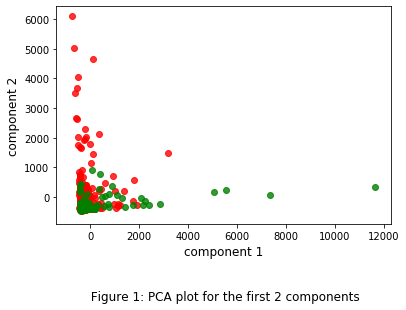

In [74]:
#plot pca

fig = plt.figure()
colors = ['red', 'green']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_5[y_train == i, 0], X_5[y_train == i, 1], color=color, alpha=.8)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('component 1\n\n\n Figure 1: PCA plot for the first 2 components', fontsize=12)
plt.ylabel('component 2', fontsize=12)

plt.show();

In [75]:
data6 = X_train[[33, 63, 207, 232, 288, 323, 346, 396, 436, 514, 533, 594, 619, 642, 673, 739, 789]]
data6 = pd.DataFrame(data6)
data6["y"] = y_train

In [76]:
rndperm = np.random.permutation(data6.shape[0])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data6.values)
data6['pca-one'] = pca_result[:,0]
data6['pca-two'] = pca_result[:,1] 
data6['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.5588326  0.35423382 0.0465568 ]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 323 samples in 0.000s...
[t-SNE] Computed neighbors for 323 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 323 / 323
[t-SNE] Mean sigma: 109.231012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.886345
[t-SNE] KL divergence after 300 iterations: 0.382450


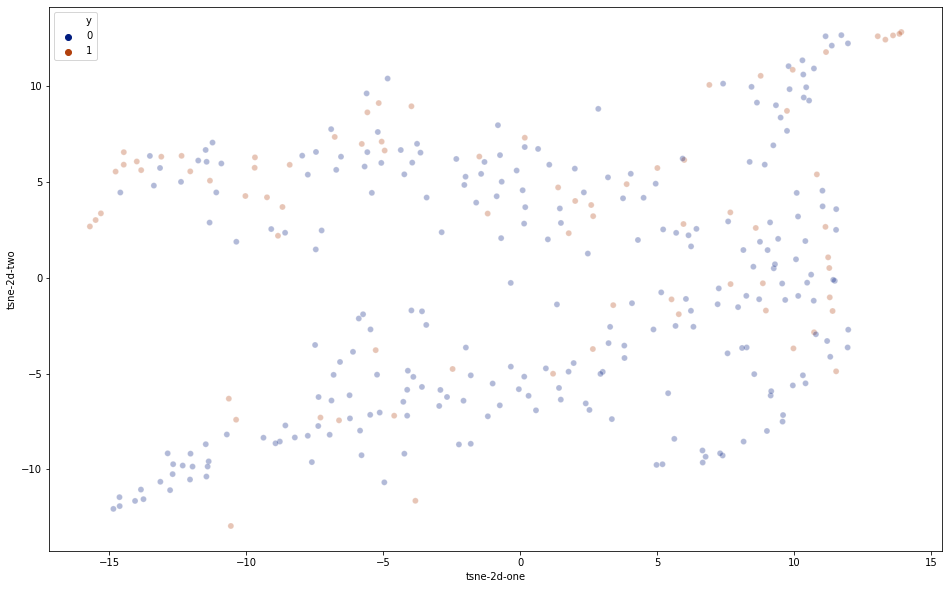

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data6)

data6['tsne-2d-one'] = tsne_results[:,0]
data6['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark",2),
    data=data6,
    legend="full",
    alpha=0.3
);

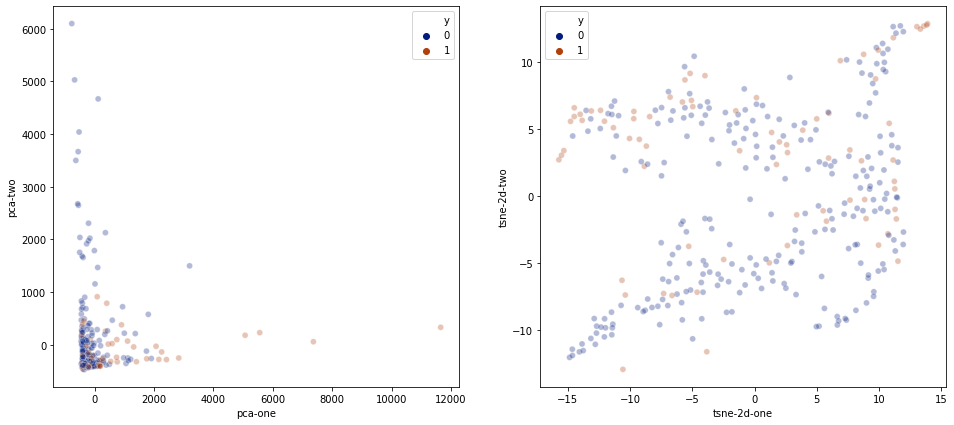

In [82]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("dark", 2),
    data=data6,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 2),
    data=data6,
    legend="full",
    alpha=0.3,
    ax=ax2
);

In [83]:
RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

LR = LogisticRegression(max_iter=100000)

In [84]:
#training data
print("Features selected from rfe_rf_5")
LR_f1 = cross_val_score(LogisticRegression(max_iter=100000), datat1, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("LR mean result:",LR_f1.mean())
print("Features selected from lasso")
LR_f2 = cross_val_score(LogisticRegression(max_iter=100000), datat2, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("LR mean result:",LR_f2.mean())
print("Features selected from rfe_rf_10")
LR_f3 = cross_val_score(LogisticRegression(max_iter=100000), datat3, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("LR mean result:",LR_f3.mean())
print("Features selected from rfe_lr")
LR_f4 = cross_val_score(LogisticRegression(max_iter=100000), datat4, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("LR mean result:",LR_f4.mean())

Features selected from rfe_rf_5
LR mean result: 0.8853219696969697
Features selected from lasso
LR mean result: 0.9102272727272727
Features selected from rfe_rf_10
LR mean result: 0.8761363636363637
Features selected from rfe_lr
LR mean result: 0.9379734848484848


In [85]:
#validation data
LR = LR.fit(datat1, y_train)
pred1 = LR.predict(datav1)


LR = LR.fit(datat2, y_train)
pred2 = LR.predict(datav2)

LR = LR.fit(datat3, y_train)
pred3 = LR.predict(datav3)

LR = LR.fit(datat4, y_train)
pred4 = LR.predict(datav4)



acc1 = accuracy_score(pred1, y_valid)
acc2 = accuracy_score(pred2, y_valid)
acc3 = accuracy_score(pred3, y_valid)
acc4 = accuracy_score(pred4, y_valid)
print("Accuracy 1:", acc1)
print("Accuracy 2:", acc2)
print("Accuracy 3:", acc3)
print("Accuracy 4:", acc4)

Accuracy 1: 0.8
Accuracy 2: 0.84
Accuracy 3: 0.8742857142857143
Accuracy 4: 0.8628571428571429


In [86]:
print("Features selected from rfe_rf_5")
RF_f1 = cross_val_score(RF, datat1, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("RF mean result:",RF_f1.mean())
print("Features selected from lasso")
RF_f2 = cross_val_score(RF, datat2, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("RF mean result:",RF_f2.mean())
print("Features selected from rfe_rf_10")
RF_f3 = cross_val_score(RF, datat3, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("RF mean result:",RF_f3.mean())
print("Features selected from rfe_lr")
RF_f4 = cross_val_score(RF, datat4, y_train, cv=StratifiedKFold(n_splits=10))
#print("LR results:", LR_f)
print("RF mean result:",RF_f4.mean())

Features selected from rfe_rf_5
RF mean result: 0.8237689393939395
Features selected from lasso
RF mean result: 0.8301136363636363
Features selected from rfe_rf_10
RF mean result: 0.8267992424242424
Features selected from rfe_lr
RF mean result: 0.8270833333333334


In [87]:
#validation data
RF = RF.fit(datat1, y_train)
pre1 = RF.predict(datav1)

RF = RF.fit(datat2, y_train)
pre2 = RF.predict(datav2)

RF = RF.fit(datat3, y_train)
pre3 = RF.predict(datav3)

RF = RF.fit(datat4, y_train)
pre4 = RF.predict(datav4)

acc_1 = accuracy_score(pre1, y_valid)
acc_2 = accuracy_score(pre2, y_valid)
acc_3 = accuracy_score(pre3, y_valid)
acc_4 = accuracy_score(pre4, y_valid)
print("Accuracy 1:", acc_1)
print("Accuracy 2:", acc_2)
print("Accuracy 3:", acc_3)
print("Accuracy 4:", acc_4)

Accuracy 1: 0.7771428571428571
Accuracy 2: 0.8285714285714286
Accuracy 3: 0.76
Accuracy 4: 0.8171428571428572


In [88]:
#Confusion Matrix LR
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrices: ")
    
print("Logistic Regression: ")
print(confusion_matrix(y_valid, pred4))
print("\n\nClassification_report LR:\n")
print(classification_report(y_valid, pred4))

Confusion matrices: 
Logistic Regression: 
[[123  11]
 [ 13  28]]


Classification_report LR:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       134
           1       0.72      0.68      0.70        41

    accuracy                           0.86       175
   macro avg       0.81      0.80      0.81       175
weighted avg       0.86      0.86      0.86       175



In [89]:
c = confusion_matrix(pred4, y_valid)
a = c[0][0]
b = c[0][1]
cc = c[1][0]
d = c[1][1]

In [90]:
y = pd.DataFrame(y_valid)
y[0].value_counts()

0    134
1     41
Name: 0, dtype: int64

In [91]:
print('                      Confusion Matrix')
print()
print(' Actual/Predicted          | Actual 0        |  Actual 1 ')
print('----------------------------------------------------------------')
print('Predicted 0                | {}             | {}'.format(a, b))
print('Predicted 1                | {}              | {}'.format(cc, d))

                      Confusion Matrix

 Actual/Predicted          | Actual 0        |  Actual 1 
----------------------------------------------------------------
Predicted 0                | 123             | 13
Predicted 1                | 11              | 28


In [92]:
#Confusion Matrix RF
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrices: ")
    
print("Random Forest: ")
print(confusion_matrix(pre4, y_valid))
print("\n\nClassification_report RF:\n")
print(classification_report(pre4, y_valid))

Confusion matrices: 
Random Forest: 
[[130  28]
 [  4  13]]


Classification_report RF:

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       158
           1       0.32      0.76      0.45        17

    accuracy                           0.82       175
   macro avg       0.64      0.79      0.67       175
weighted avg       0.91      0.82      0.85       175



In [93]:
c1 = confusion_matrix(pre4, y_valid)
a1 = c1[0][0]
b1 = c1[0][1]
cc1 = c1[1][0]
d1 = c1[1][1]

In [94]:
print('                      Confusion Matrix')
print()
print(' Actual/Predicted          | Actual 0        |  Actual 1 ')
print('----------------------------------------------------------------')
print('Predicted 0                | {}             | {}'.format(a1, b1))
print('Predicted 1                | {}               | {}'.format(cc1, d1))

                      Confusion Matrix

 Actual/Predicted          | Actual 0        |  Actual 1 
----------------------------------------------------------------
Predicted 0                | 130             | 28
Predicted 1                | 4               | 13


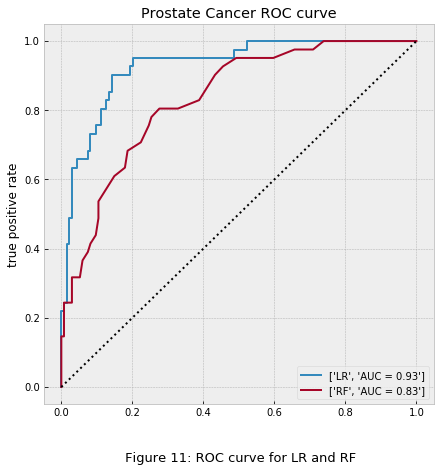

In [95]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

plt.style.use('bmh')


scores1 = LR.decision_function(datav4)
scores2 = RF.predict_proba(datav4)[:,1]
fprs1, tprs1, _ = roc_curve(y_valid, scores1, pos_label=1)
fprs2, tprs2, thresholds = roc_curve(y_valid, scores2, pos_label=1)


roc_auc1 = auc(fprs1, tprs1)
roc_auc2 = auc(fprs2, tprs2)


plt.figure(figsize=(7,7))
plt.plot(fprs1, tprs1, label = ['LR', 'AUC = %0.2f' % roc_auc1])
plt.plot(fprs2, tprs2, label = ['RF', 'AUC = %0.2f' % roc_auc2])

plt.plot([0, 1], 'k:')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')



roc_auc_score(y_valid ==1, scores1)
roc_auc_score(y_valid ==1, scores2)

plt.title('Prostate Cancer ROC curve')
plt.xlabel('\n\n Figure 11: ROC curve for LR and RF', fontsize = 13)
plt.legend();